In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
col_names=['datetime','lat','lon','base']
df_uber = pd.read_csv("uber.csv",
                     header=None,
                     names = col_names)

In [28]:
df_uber.head()

,datetime,lat,lon,base
0,2014-08-01 00:00:00,40.7290,-73.9422,B02598
1,2014-08-01 00:00:00,40.7476,-73.9871,B02598
2,2014-08-01 00:00:00,40.7424,-74.0044,B02598
3,2014-08-01 00:00:00,40.7510,-73.9869,B02598
4,2014-08-01 00:00:00,40.7406,-73.9902,B02598


In [8]:
df_uber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829275 entries, 0 to 829274
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datatime  829275 non-null  object 
 1   lat       829275 non-null  float64
 2   lon       829275 non-null  float64
 3   base      829275 non-null  object 
dtypes: float64(2), object(2)
memory usage: 25.3+ MB


In [9]:
df_uber.describe()

,lat,lon
count,829275.000000,829275.000000
mean,40.737781,-73.970160
std,0.043628,0.061483
min,39.656900,-74.773700
25%,40.719000,-73.995800
50%,40.740700,-73.982600
75%,40.760500,-73.961200
max,41.318200,-72.335900


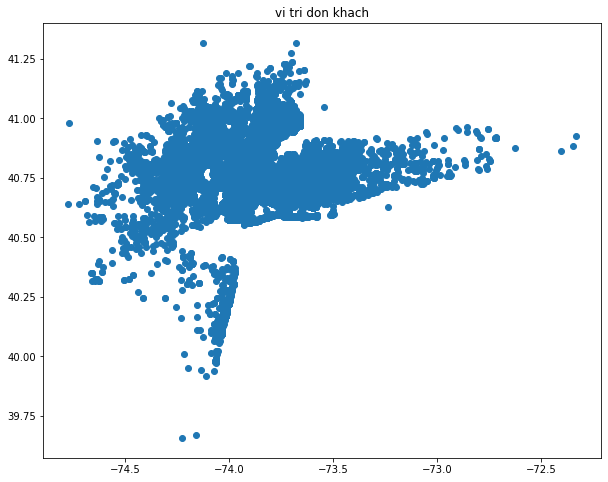

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(x=df_uber.lon,y=df_uber.lat)
plt.title("vi tri don khach")
plt.xlim=[-74.8,-72.2]
plt.ylim=[39.7,41.3]
plt.gird=True
plt.show()

In [12]:
from sklearn.cluster import KMeans
model_km=KMeans(n_clusters=12)
model_km.get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 12,
 'n_init': 10,
 'n_jobs': 'deprecated',
 'precompute_distances': 'deprecated',
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [15]:
model_km.fit_predict(df_uber.iloc[:,[1,2]])
df_uber['cluster']=model_km.labels_

In [17]:
#danh sach tam cua cac cluster
center = model_km.cluster_centers_
print(center)

[[ 40.75481462 -73.9836492 ]
 [ 40.65535826 -73.77847467]
 [ 40.7612083  -73.86367933]
 [ 40.70260297 -74.20116207]
 [ 40.66917251 -73.97919621]
 [ 40.77938579 -73.95750295]
 [ 40.70956666 -73.94551297]
 [ 40.76896109 -73.4642774 ]
 [ 40.85308138 -73.92676369]
 [ 40.99515436 -73.77704941]
 [ 40.72567976 -74.00003387]
 [ 40.20412384 -74.05272747]]


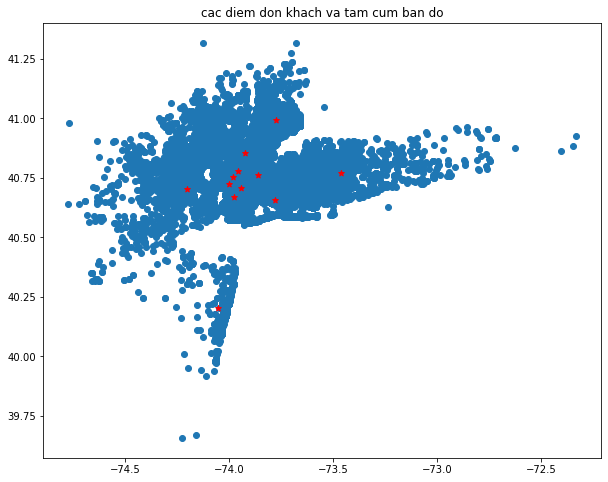

In [18]:
plt.figure(figsize=(10,8))
plt.scatter(x=df_uber.lon,y=df_uber.lat)
plt.scatter(x=center[:,1],y=center[:,0],c='red',marker='*')
plt.title('cac diem don khach va tam cum ban do')
plt.xlim=[-75,-73]
plt.ylim=[40.42]
plt.grid=True
plt.show()

In [19]:
df_uber.loc[df_uber.cluster==3].head(20)

,datatime,lat,lon,base,cluster
394,2014-08-01 00:28:00,40.8251,-74.1376,B02598,3
538,2014-08-01 00:40:00,40.7273,-74.1492,B02617,3
647,2014-08-01 00:50:00,40.7957,-74.4804,B02682,3
724,2014-08-01 00:59:00,40.6950,-74.1781,B02598,3
918,2014-08-01 01:21:00,40.6956,-74.1781,B02617,3
922,2014-08-01 01:22:00,40.6879,-74.1812,B02512,3
930,2014-08-01 01:22:00,40.6950,-74.1782,B02617,3
1092,2014-08-01 01:44:00,40.6878,-74.1821,B02512,3
1093,2014-08-01 01:44:00,40.6878,-74.1821,B02512,3
1120,2014-08-01 01:46:00,40.7959,-74.4806,B02682,3


In [20]:
sum_cluster=df_uber.cluster.value_counts()
sum_cluster = sum_cluster.sort_values(ascending=False)
print(sum_cluster)

0     258490
10    255237
5     100312
6      67209
4      60300
2      32852
1      25954
8      15306
3       8479
9       2446
7       2195
11       495
Name: cluster, dtype: int64


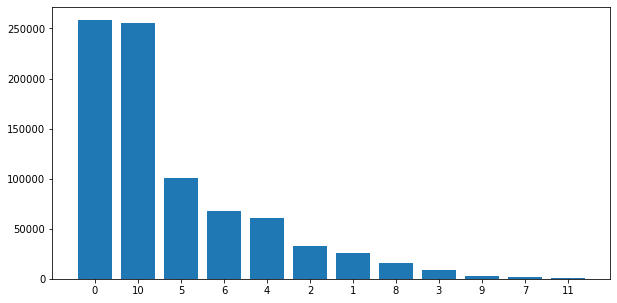

In [21]:
plt.figure(figsize=(10,5))
plt.bar(list(map(str,sum_cluster.index)),list(sum_cluster.values))
plt.grid=True
plt.show()
        

In [23]:
rate_allmax=sum_cluster.iloc[:3].sum()/sum_cluster.sum()
print(round(rate_allmax*100,2))

74.05


In [34]:
df_uber['datetime']=pd.to_datetime(df_uber['datetime'])

In [35]:
df_new=df_uber.copy()

In [36]:
df_new.set_index('datetime',inplace=True)

In [37]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829275 entries, 2014-08-01 00:00:00 to 2014-08-31 23:59:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     829275 non-null  float64
 1   lon     829275 non-null  float64
 2   base    829275 non-null  object 
dtypes: float64(2), object(1)
memory usage: 25.3+ MB


In [38]:
df_new.head()

,lat,lon,base
datetime,,,
2014-08-01,40.7290,-73.9422,B02598
2014-08-01,40.7476,-73.9871,B02598
2014-08-01,40.7424,-74.0044,B02598
2014-08-01,40.7510,-73.9869,B02598
2014-08-01,40.7406,-73.9902,B02598


In [41]:
df_hours=df_new.resample('h').count()

In [43]:
by_time=df_hours.groupby(df_hours.index.time).sum()
by_time

,lat,lon,base
00:00:00,21451,21451,21451
01:00:00,14471,14471,14471
02:00:00,10105,10105,10105
03:00:00,10376,10376,10376
04:00:00,11774,11774,11774
05:00:00,16525,16525,16525
06:00:00,24907,24907,24907
07:00:00,34064,34064,34064
08:00:00,34566,34566,34566
09:00:00,30195,30195,30195


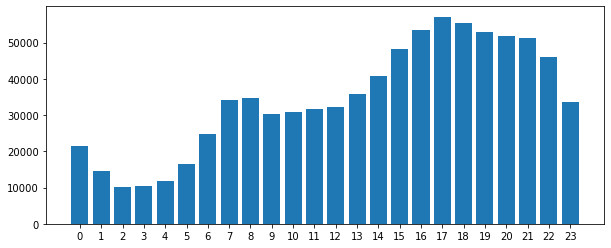

In [45]:
y1 = by_time.iloc[:,0].values
x1 = list(map(str,np.arange(0,24)))
plt.figure(figsize=(10,4))
plt.bar(x1, y1)
plt.show()